In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [2]:
#Algoritmos para calcular raices

In [3]:
#Metodo de biseccion
def biseccion(f,a,b,N):
    
    if f(a)*f(b)>0.0:
         print "No hay raiz en el intervalo dado"
    
    for i in xrange(1,N):
        pm=(a+b)/2.0
        
        if f(pm)*f(a)<0.0:
            b=pm
            print pm
        if f(pm)*f(b)<0.0:
            a=pm
            print pm
    return pm  

In [4]:
#Metodo de Newton-Rhapson
def nr(f,df,pin,N):
    p=pin
    for i in xrange(0,N):
        p=p-(f(p)/df(p))
        print p
    return p

In [5]:
#Metodo del punto fijo
def punto_fijo(f,p0,N):
    
    g = lambda x: x-f(x)
    
    for i in xrange(0,N):
        p1=g(p0)
        p0=p1
        print p0
    return p0

In [6]:
#primer punto

In [7]:
"""
Solucion para la ecuacion de la ecuacion de Kepler, ecuacion 
de tipo trascendental de alta importancia en astronomia. La solucion
se hace para el cometa Beethoven pues su orbita esta casi totalmente
sobre la ecliptica i=2.73 grados
"""
grad=180.0/np.pi
rad=np.pi/180.0
#Ecuacion de kepler
def ec_kepler(E):
    f=E-e*np.sin(E)-M
    return f
#Derivada ecuacion de kepler
def d_kepler(E):
    df=1.0-e*np.cos(E)
    return df

In [8]:
#informacion para la ecuacion
tp=2457427.543855121499    #fecha juliana, dias,2016-Feb-09.04385512
t=2457508.5000000          #2016-Apr-30 00:00:00
periodo=2047.343285965675  #dias
e=0.1872699504244361       #ecentricidad
a=3.155451391965179        #semieje mayor AU
n=2*np.pi/periodo          #mean orbital motion numericamente rad/dia
M=n*(t-tp)                 #anomalia media en rad
print M
#datos tomados de: http://ssd.jpl.nasa.gov/sbdb.cgi#top

0.248450010076


In [9]:
#Solucion por biseccion
E_bic=biseccion(ec_kepler,-0.5,0.5,10)
print 'E por biseccion = ',E_bic

#Solucion por punto fijo
E_pf=punto_fijo(ec_kepler,M,5)
print 'E por punto fijo = ',E_pf

#Solucion por Newton Rhapson
E_nr=nr(ec_kepler,d_kepler,M,5)
print 'E por Newtom-Rhapson = ',E_nr


0.0
0.25
0.375
0.3125
0.28125
0.296875
0.3046875
0.30078125
0.302734375
E por biseccion =  0.302734375
0.294500038866
0.302807257413
0.304294080481
0.304559787914
0.304607258956
E por punto fijo =  0.304607258956
0.30471285853
0.304617584586
0.304617584275
0.304617584275
0.304617584275
E por Newtom-Rhapson =  0.304617584275


In [10]:
"""
Vemos arriba que el metodo de mayor convergencia es el de Newton Rhapson
"""

'\nVemos arriba que el metodo de mayor convergencia es el de Newton Rhapson\n'

In [11]:
#2 punto, masa de  Gliese 832c

In [58]:
#datos
ro=18000.0       #Kg/m^3
L=6500000.0      #metros
m_t=5.97e24      #masa de la Tierra en Kg
m_g=5.40*m_t     #masa de Gliese 832c
r_t=6378100.0    #radio de la Tierra
aprox=1.75*r_t   #aproximacion al radio de Gliese 832c
print m_g
print aprox

3.2238e+25
11161675.0


In [92]:
#Solucion a la integral para la masa
def masa(R):
    M =( 2*L**3 -L*np.exp(-R/L) * ( R**2 + 2*L*R + 2*L**2) ) * 4.0*np.pi*ro
    cero=M
    return cero

M_g=( 2*L**3 -L*np.exp(-R/L) * ( R**2 + 2*L*R + 2*L**2) ) * 4.0*np.pi*ro

def cero(R):
    cero=m_g-M_g
    return cero
#R=1.7967*r_t
#M =( -L*np.exp(-R/L)*( R**2 + 2*L*R + 2*L**2) + 2*L**3 ) * 4.0*np.pi*ro
#print M,(m_g-M)/m_g*100.

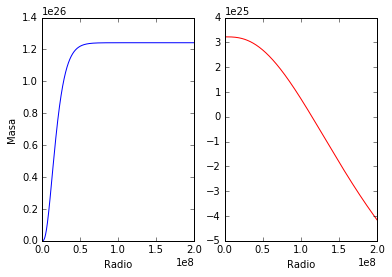

In [99]:
R=np.linspace(0.,200000000,5000)

plt.subplot(1,2,1)
plt.plot(R,masa(R),'blue')
plt.xlabel('Radio')
plt.ylabel('Masa')


plt.subplot(1,2,2)
plt.plot(R,cero(R),'red')
plt.xlabel('Radio')


In [102]:
radio=punto_fijo(masa,aprox,10)
radio_2 =biseccion(cero,1e7,1e7,10)

-3.07262579617e+25
inf
nan
nan
nan
nan
nan
nan
nan
nan


/home/main/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/main/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()